In [5]:
import numpy as np
import pandas as pd

# two-class classification
data_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', dtype = None, delimiter=';')
data_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', dtype = None, delimiter=';')

# 12개의 입력 -> two-class (red or white)
# print(data_red) # 1599개
# print(data_white) # 4898개

In [6]:
# pandas class -> numpy ndarray
X0 = data_red.to_numpy()
X1 = data_white.to_numpy()

N0,D = X0.shape
N1,D = X1.shape

# target value
t0 = np.zeros(N0, dtype = int) # red wine = 0
t1 = np.ones(N1, dtype = int) # white wine = 1

# 전체 dataset
X = np.vstack((X0, X1)) # input, 12차원의 입력
t = np.hstack((t0, t1)) # output, {0, 1} 구분, two-class
C = np.cov(X.T) # X = (6497 x 12) // C = (12, 12) transpose 해줘야함
U, s, V = np.linalg.svd(C, full_matrices = True)
# C = U * diag(s) * V
S = np.diag(s)
V = V.T
# print(U.shape)
# print(U)

# normalization, 
Xmin = np.min(X, axis = 0)
Xmax = np.max(X, axis = 0)
X = (X - Xmin) / (Xmax - Xmin)
# X ~ [0, 1]

# N,D = X.shape
# print(X.shape)

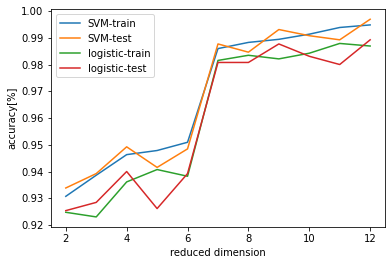

In [8]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
svm_train_list ,svm_test_list, logistic_train_list,logistic_test_list = [0 for _ in range(13)],[0 for _ in range(13)],[0 for _ in range(13)],[0 for _ in range(13)]
# 리스트 초기화
model1 = svm.SVC(kernel = 'rbf') # radial basis function
model2 = LogisticRegression()
for i in range(2,13):
    X_ = X.dot(U[:,0:i]) # reduced dimension
    X_train, X_test, t_train, t_test = train_test_split(X_, t, test_size = 0.20)

    N_train,D_train = X_train.shape
    N_test,D_test = X_test.shape

    # 학습
    model1.fit(X_train, t_train)
    model2.fit(X_train, t_train)

    # 예측
    t1_train = model1.predict(X_train)
    t2_train = model2.predict(X_train)
    t1_test = model1.predict(X_test)
    t2_test = model2.predict(X_test)
    # accuracy
    svm_train = np.sum(t_train == t1_train) / N_train  # SVM, 학습데이터
    svm_test = np.sum(t_test  == t1_test)  / N_test   # SVM, 테스트셋
    logistic_train = np.sum(t_train == t2_train) / N_train  # logistic, 학습데이터
    logistic_test = np.sum(t_test  == t2_test)  / N_test   # logistic, 테스트셋
    svm_train_list[i] = svm_train
    svm_test_list[i] = svm_test 
    logistic_train_list[i] = logistic_train
    logistic_test_list[i] = logistic_test

plt.figure()
plt.xlabel('reduced dimension')
plt.ylabel('accuracy[%]')
plt.plot(range(2,13),svm_train_list[2:], label = 'SVM-train')
plt.plot(range(2,13),svm_test_list[2:], label = 'SVM-test')
plt.plot(range(2,13),logistic_train_list[2:], label = 'logistic-train')
plt.plot(range(2,13),logistic_test_list[2:], label = 'logistic-test')
plt.legend()
plt.show()

